MINGGU 1: SETUP AWAL & EXPLORATORY DATA ANALYSIS
Tanggal: 18-24 November 2025
Aktivitas: Mount Drive, Install Library, Analisis Dataset
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

📂 SETTING UP DATASET PATHS...

📁 Struktur Dataset di Google Drive:
/content/drive/My Drive/dataset_images
/content/drive/My Drive/dataset_images/bullish
/content/drive/My Drive/dataset_images/bearish
/content/drive/My Drive/dataset_images/sideways
✅ bullish: 334 gambar
✅ bearish: 333 gambar
✅ sideways: 333 gambar

📊 TOTAL GAMBAR: 1000
🔢 DISTRIBUSI: {'bullish': 334, 'bearish': 333, 'sideways': 333}


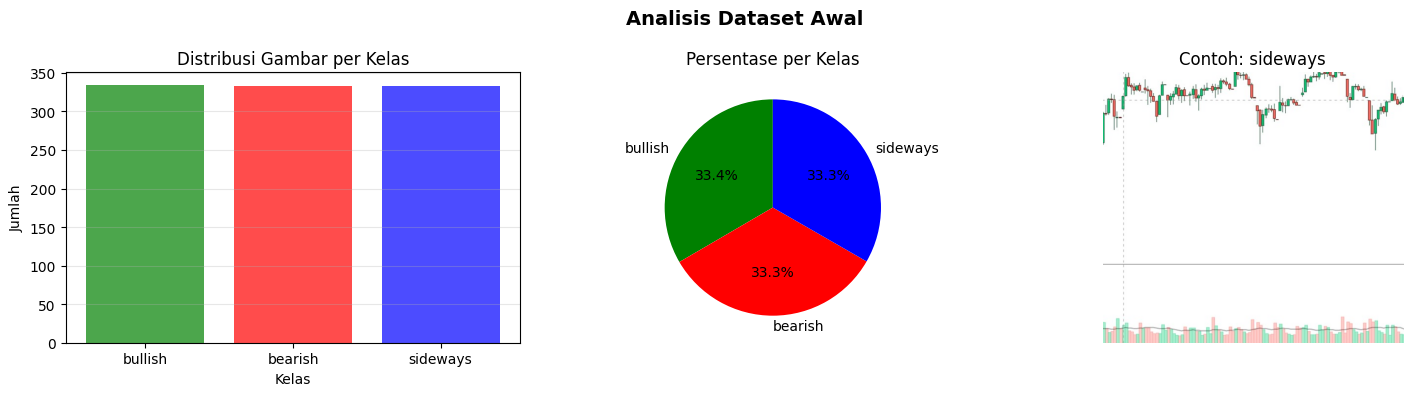


MINGGU 1 SELESAI! ✓


In [ ]:
# ==================== MINGGU 1: SETUP & EDA ====================
print("="*60)
print("MINGGU 1: SETUP AWAL & EXPLORATORY DATA ANALYSIS")
print("="*60)
print("Tanggal: 18-24 November 2025")
print("Aktivitas: Mount Drive, Install Library, Analisis Dataset")
print("="*60)

# Install Library
!pip install -q tensorflow opencv-python matplotlib seaborn scikit-plot pandas numpy scikit-learn imbalanced-learn pillow
!apt-get install -qq tree > /dev/null

# Import Library
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight
import warnings
warnings.filterwarnings('ignore')

# Set random seed
np.random.seed(42)
tf.random.set_seed(42)

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Setup Path Dataset
print("\n📂 SETTING UP DATASET PATHS...")
base_path = "/content/drive/My Drive/dataset_images/"

# Verifikasi struktur folder
print("\n📁 Struktur Dataset di Google Drive:")
!find "/content/drive/My Drive/dataset_images" -type d 2>/dev/null | head -10

# Definisikan kelas
classes = ['bullish', 'bearish', 'sideways']
class_indices = {cls: idx for idx, cls in enumerate(classes)}

# Analisis Dataset
image_paths = []
labels = []
image_counts = {}

for cls in classes:
    class_path = os.path.join(base_path, cls)

    if not os.path.exists(class_path):
        print(f"❌ Folder '{cls}' tidak ditemukan!")
        continue

    valid_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff')
    images = [f for f in os.listdir(class_path) if f.lower().endswith(valid_extensions)]

    image_counts[cls] = len(images)
    print(f"✅ {cls}: {len(images)} gambar")

    for img_name in images:
        img_path = os.path.join(class_path, img_name)
        image_paths.append(img_path)
        labels.append(cls)

# Konversi ke numpy array
image_paths = np.array(image_paths)
labels = np.array(labels)

print(f"\n📊 TOTAL GAMBAR: {len(image_paths)}")
print(f"🔢 DISTRIBUSI: {image_counts}")

# Visualisasi Distribusi
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Bar Chart
colors = ['green', 'red', 'blue']
axes[0].bar(image_counts.keys(), image_counts.values(), color=colors, alpha=0.7)
axes[0].set_title('Distribusi Gambar per Kelas')
axes[0].set_xlabel('Kelas')
axes[0].set_ylabel('Jumlah')
axes[0].grid(axis='y', alpha=0.3)

# Pie Chart
axes[1].pie(image_counts.values(), labels=image_counts.keys(),
           colors=colors, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Persentase per Kelas')

# Contoh Gambar
for idx, cls in enumerate(classes):
    if image_counts[cls] > 0:
        cls_images = [p for p, l in zip(image_paths, labels) if l == cls]
        if cls_images:
            img_path = cls_images[0]
            try:
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                axes[2].imshow(img)
                axes[2].set_title(f'Contoh: {cls}')
                axes[2].axis('off')
            except:
                axes[2].text(0.5, 0.5, f'Error loading {cls}', ha='center', va='center')
                axes[2].axis('off')

plt.suptitle('Analisis Dataset Awal', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("MINGGU 1 SELESAI! ✓")
print("="*60)


MINGGU 2: PREPROCESSING & AUGMENTASI DATA
Tanggal: 25 November - 1 Desember 2025
Aktivitas: Resize, Normalisasi, Augmentasi, Train-Test Split

📊 SPLIT DATASET:
✅ Training: 800 gambar
✅ Validation: 100 gambar
✅ Test: 100 gambar

⚡ MEMBUAT DATASET...
✅ Training batches: 25
✅ Validation batches: 4
✅ Test batches: 4

🔍 VERIFIKASI SHAPE:
  Images shape: (32, 224, 224, 3)
  Labels shape: (32, 3)
  Sample label: [1. 0. 0.]

👀 VISUALISASI BATCH TRAINING:


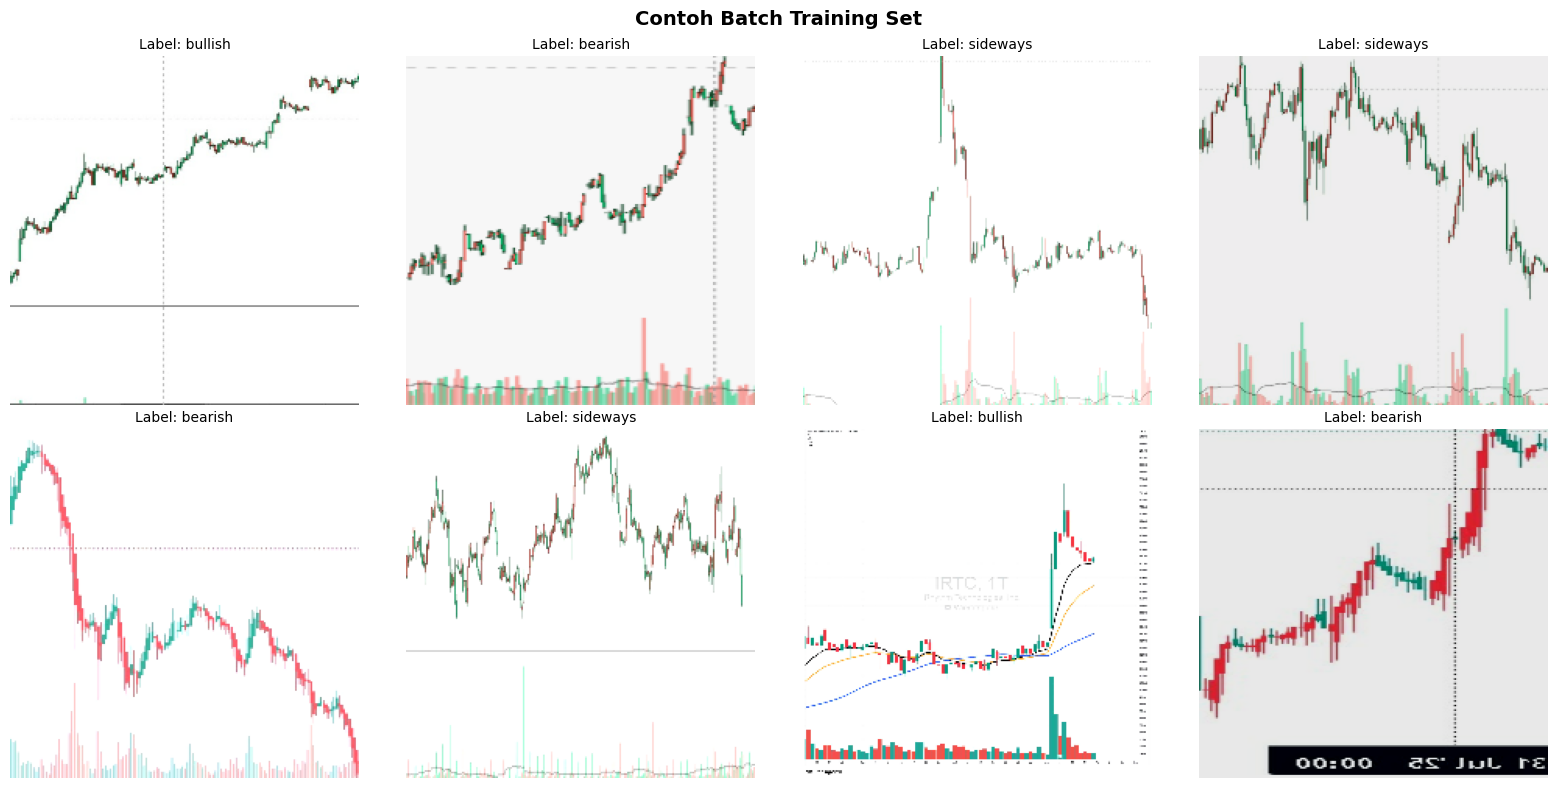


MINGGU 2 SELESAI! ✓


In [ ]:
# ==================== MINGGU 2: PREPROCESSING ====================
print("\n" + "="*60)
print("MINGGU 2: PREPROCESSING & AUGMENTASI DATA")
print("="*60)
print("Tanggal: 25 November - 1 Desember 2025")
print("Aktivitas: Resize, Normalisasi, Augmentasi, Train-Test Split")
print("="*60)

# Konfigurasi
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Fungsi Preprocessing yang DIPERBAIKI
def load_and_preprocess_image(img_path, label_idx=None, augment=False):
    """Load dan preprocess gambar dengan label sebagai indeks integer"""
    # Baca file
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3, expand_animations=False)
    img = tf.image.convert_image_dtype(img, tf.float32)

    # Resize
    img = tf.image.resize(img, IMG_SIZE, method='bilinear')

    # Augmentasi
    if augment:
        img = tf.image.random_flip_left_right(img)
        img = tf.image.random_brightness(img, max_delta=0.1)
        img = tf.image.random_contrast(img, lower=0.9, upper=1.1)

    if label_idx is not None:
        # Convert label index to one-hot encoding
        return img, tf.one_hot(label_idx, depth=len(classes))
    return img

# Split Dataset
print("\n📊 SPLIT DATASET:")

# Convert labels to indices BEFORE splitting
label_indices = np.array([class_indices[label] for label in labels])

train_paths, temp_paths, train_label_idx, temp_label_idx = train_test_split(
    image_paths, label_indices, test_size=0.2, random_state=42, stratify=label_indices
)

val_paths, test_paths, val_label_idx, test_label_idx = train_test_split(
    temp_paths, temp_label_idx, test_size=0.5, random_state=42, stratify=temp_label_idx
)

print(f"✅ Training: {len(train_paths)} gambar")
print(f"✅ Validation: {len(val_paths)} gambar")
print(f"✅ Test: {len(test_paths)} gambar")

# Buat Dataset Pipeline yang DIPERBAIKI
def create_dataset(paths, label_indices, augment=False, shuffle=True, batch_size=32):
    """Membuat tf.data.Dataset dengan label sebagai indeks integer"""
    # Buat dataset dari tensor slices
    dataset = tf.data.Dataset.from_tensor_slices((paths, label_indices))

    # Map fungsi preprocessing
    def process_path_label(path, label_idx):
        return load_and_preprocess_image(path, label_idx, augment=augment)

    dataset = dataset.map(process_path_label, num_parallel_calls=tf.data.AUTOTUNE)

    if shuffle:
        dataset = dataset.shuffle(buffer_size=1000)

    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)

    return dataset

# Buat semua dataset
print("\n⚡ MEMBUAT DATASET...")
train_dataset = create_dataset(train_paths, train_label_idx, augment=True, shuffle=True, batch_size=BATCH_SIZE)
val_dataset = create_dataset(val_paths, val_label_idx, augment=False, shuffle=False, batch_size=BATCH_SIZE)
test_dataset = create_dataset(test_paths, test_label_idx, augment=False, shuffle=False, batch_size=BATCH_SIZE)

print(f"✅ Training batches: {len(train_dataset)}")
print(f"✅ Validation batches: {len(val_dataset)}")
print(f"✅ Test batches: {len(test_dataset)}")

# Verifikasi shape
print("\n🔍 VERIFIKASI SHAPE:")
for images, labels_batch in train_dataset.take(1):
    print(f"  Images shape: {images.shape}")
    print(f"  Labels shape: {labels_batch.shape}")
    print(f"  Sample label: {labels_batch[0].numpy()}")

# Visualisasi batch
print("\n👀 VISUALISASI BATCH TRAINING:")
images_batch, labels_batch = next(iter(train_dataset))

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for i in range(min(8, len(images_batch))):
    img = images_batch[i].numpy()
    img = np.clip(img, 0, 1)
    label_idx = np.argmax(labels_batch[i].numpy())

    axes[i].imshow(img)
    axes[i].set_title(f"Label: {classes[label_idx]}", fontsize=10)
    axes[i].axis('off')

plt.suptitle('Contoh Batch Training Set', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("MINGGU 2 SELESAI! ✓")
print("="*60)


MINGGU 3: MODEL BUILDING & TRAINING
Tanggal: 2-8 Desember 2025
Aktivitas: Arsitektur CNN, Training, Hyperparameter Tuning
🧱 MEMBANGUN MODEL CNN...

📋 MODEL SUMMARY:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 432,451 (1.65 MB)

 Trainable params: 431,107 (1.64 MB)

 Non-trainable params: 1,344 (5.25 KB)


⏰ SETUP CALLBACKS...
✅ Model akan disimpan di: /content/drive/My Drive/stock_model_20251213_165451

🚀 MEMULAI TRAINING...
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.4835 - loss: 1.1999 - precision: 0.4995 - recall: 0.3904
Epoch 1: val_accuracy improved from -inf to 0.34000, saving model to /content/drive/My Drive/stock_model_20251213_165451/best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 205s 8s/step - accuracy: 0.4853 - loss: 1.1956 - precision: 0.5021 - recall: 0.3933 - val_accuracy: 0.3400 - val_loss: 1.1352 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.7203 - loss: 0.6794 - precision: 0.7468 - recall: 0.6821
Epoch 2: val_accuracy did not improve from 0.34000
25/25 ━━━━━━━━━━━━━━━━━━━━ 201s 7s/step - accuracy: 0.7204 - loss: 0.6792 - precision: 0.7471 - recall: 0.6825 - val_accuracy: 0.3400 - val_loss: 1.4471 - val_precision: 0.3400 - val_recall: 0.3400 - learning_rate: 0.0

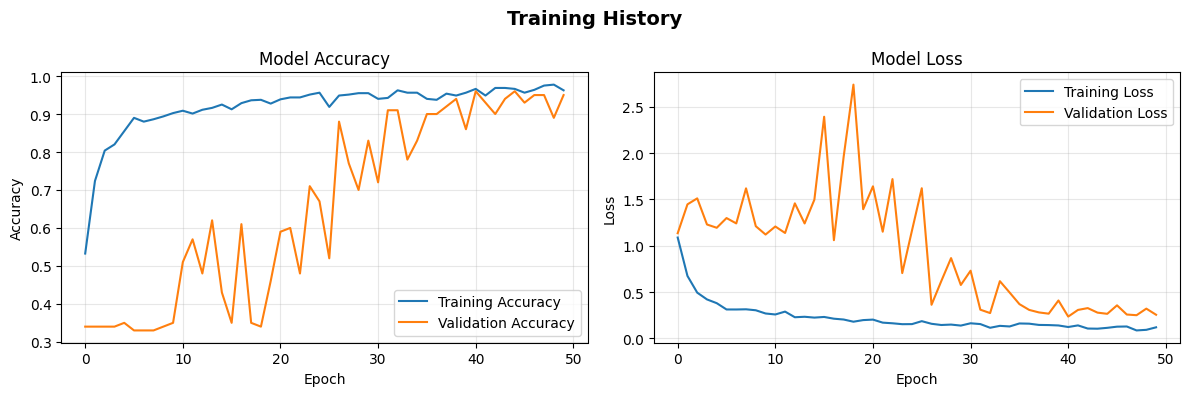


MINGGU 3 SELESAI! ✓


In [ ]:
# ==================== MINGGU 3: MODEL BUILDING & TRAINING ====================
print("\n" + "="*60)
print("MINGGU 3: MODEL BUILDING & TRAINING")
print("="*60)
print("Tanggal: 2-8 Desember 2025")
print("Aktivitas: Arsitektur CNN, Training, Hyperparameter Tuning")
print("="*60)

# Bangun Model CNN
def build_cnn_model(input_shape=(224, 224, 3), num_classes=3):
    """Membangun CNN untuk klasifikasi"""
    model = keras.Sequential([
        # Block 1
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Block 2
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Block 3
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Block 4
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.5),

        # Dense Layers
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),

        # Output
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Build dan compile model
print("🧱 MEMBANGUN MODEL CNN...")
model = build_cnn_model()

# Compile model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'precision', 'recall']
)

print("\n📋 MODEL SUMMARY:")
model.summary()

# Setup Callbacks
print("\n⏰ SETUP CALLBACKS...")
import datetime
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
model_dir = f"/content/drive/My Drive/stock_model_{timestamp}"
os.makedirs(model_dir, exist_ok=True)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(model_dir, 'best_model.keras'),
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
]

print(f"✅ Model akan disimpan di: {model_dir}")

# Training Model
print("\n🚀 MEMULAI TRAINING...")
EPOCHS = 50

history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=val_dataset,
    callbacks=callbacks,
    verbose=1
)

print("✅ TRAINING SELESAI!")

# Save final model
model.save(os.path.join(model_dir, 'final_model.keras'))

# Visualisasi Training
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.suptitle('Training History', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("MINGGU 3 SELESAI! ✓")
print("="*60)


MINGGU 4: EVALUASI MODEL & DOKUMENTASI
Tanggal: 9-15 Desember 2025
Aktivitas: Testing, Evaluasi Metrik, Visualisasi, Dokumentasi
🔄 LOADING BEST MODEL...
✅ Best model loaded dari: /content/drive/My Drive/stock_model_20251213_165451/best_model.keras

🧪 EVALUASI PADA TEST SET (UNSEEN DATA):
📊 TEST RESULTS:
🔴 Test Loss: 0.1987
🟢 Test Accuracy: 0.9500 (95.00%)
🔵 Test Precision: 0.9495
🟡 Test Recall: 0.9400

🔮 MEMBUAT PREDIKSI PADA TEST SET...

📋 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

     bullish     0.8684    1.0000    0.9296        33
     bearish     1.0000    0.9412    0.9697        34
    sideways     1.0000    0.9091    0.9524        33

    accuracy                         0.9500       100
   macro avg     0.9561    0.9501    0.9506       100
weighted avg     0.9566    0.9500    0.9507       100


🎯 CONFUSION MATRIX:


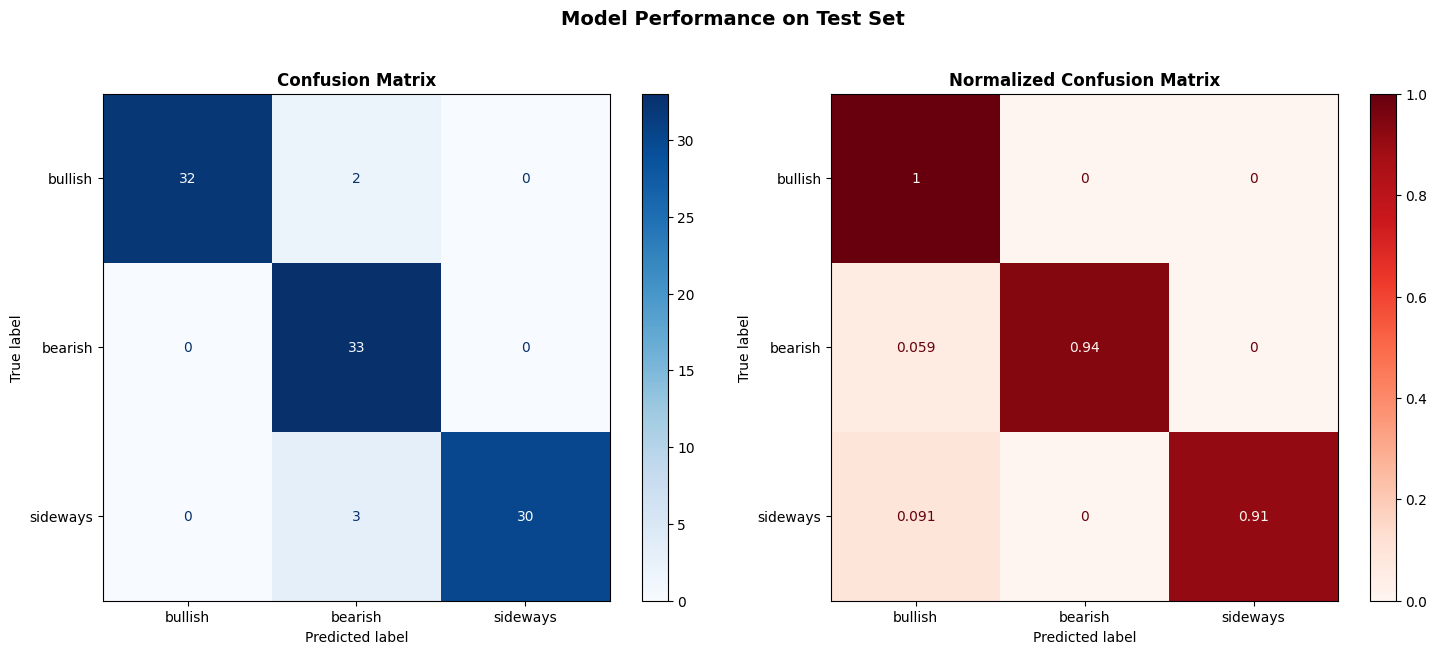


👁️ VISUALISASI PREDIKSI UNTUK SAMPLE GAMBAR:


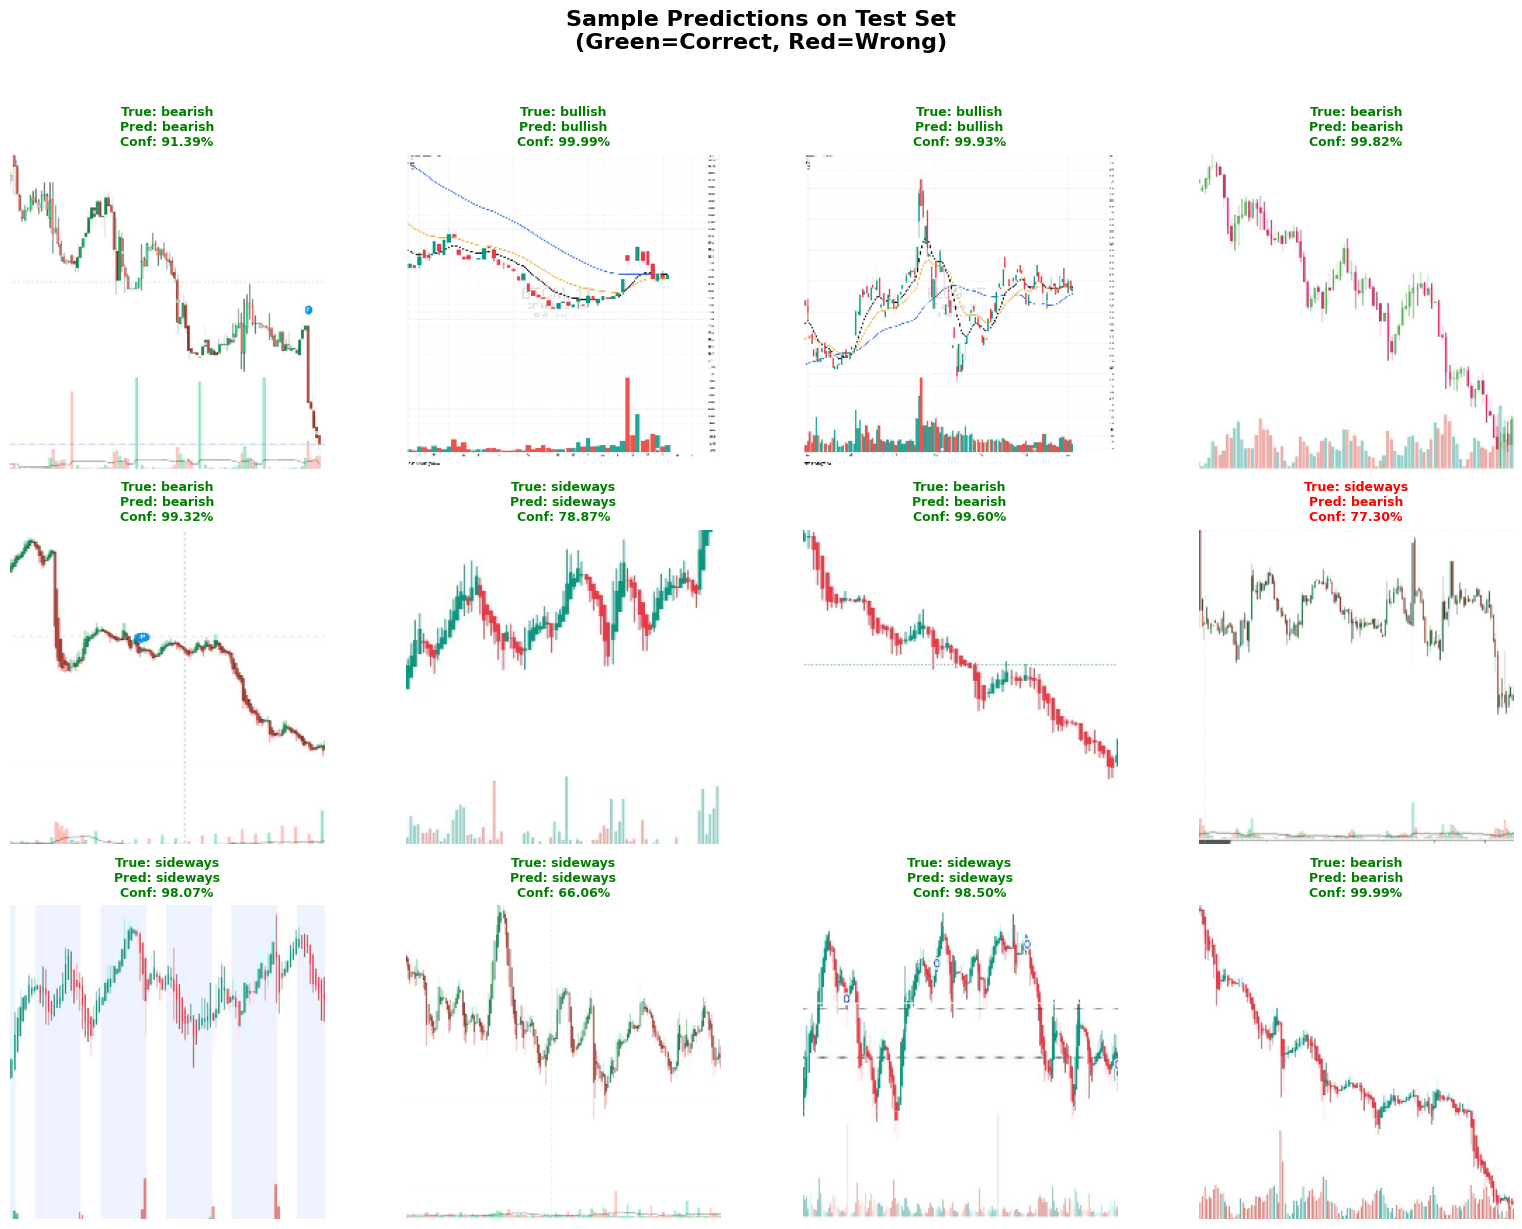


🔬 ERROR ANALYSIS:
✅ Total errors: 5 dari 100 gambar (5.00%)

📊 Distribusi error per kelas:
   - sideways→bearish: 3 errors
   - bullish→bearish: 2 errors

💾 MENYIMPAN HASIL EVALUASI...
✅ Hasil evaluasi disimpan di: /content/drive/My Drive/stock_model_20251213_165451/evaluation_results.json

📝 GENERATING DOCUMENTATION...
✅ README disimpan di: /content/drive/My Drive/stock_model_20251213_165451/README.md

🎉 PROYEK SELESAI - SUMMARY FINAL
📊 HASIL AKHIR:
   - Test Accuracy: 95.00%
   - Target Accuracy: 75.00%
   - Status: ✅ TERCAPAI

📁 OUTPUT:
   - Model saved: /content/drive/My Drive/stock_model_20251213_165451
   - Evaluation results: /content/drive/My Drive/stock_model_20251213_165451/evaluation_results.json
   - Documentation: /content/drive/My Drive/stock_model_20251213_165451/README.md

🔧 TEKNIKAL:
   - Total params: 432,451
   - Training epochs: 50
   - Error rate: 5.00%

🎯 RECOMMENDATIONS:
   1. Tambah data untuk meningkatkan generalisasi
   2. Coba transfer learning dengan Effici

In [ ]:
# ==================== MINGGU 4: EVALUATION & DOCUMENTATION ====================
print("\n" + "="*60)
print("MINGGU 4: EVALUASI MODEL & DOKUMENTASI")
print("="*60)
print("Tanggal: 9-15 Desember 2025")
print("Aktivitas: Testing, Evaluasi Metrik, Visualisasi, Dokumentasi")
print("="*60)

# 4.1 Load Best Model
print("🔄 LOADING BEST MODEL...")

# Cari folder model terbaru jika belum ada model_dir
if 'model_dir' not in locals():
    # Cari folder model terbaru di Google Drive
    import glob
    model_folders = glob.glob("/content/drive/My Drive/stock_model_*")
    if model_folders:
        model_dir = max(model_folders, key=os.path.getmtime)
        print(f"✅ Found latest model folder: {model_dir}")
    else:
        print("❌ No model folder found!")
        model_dir = "/content/drive/My Drive/stock_model_latest"

best_model_path = os.path.join(model_dir, 'best_model.keras')
final_model_path = os.path.join(model_dir, 'final_model.keras')

if os.path.exists(best_model_path):
    model = keras.models.load_model(best_model_path)
    print(f"✅ Best model loaded dari: {best_model_path}")
elif os.path.exists(final_model_path):
    model = keras.models.load_model(final_model_path)
    print(f"✅ Final model loaded dari: {final_model_path}")
else:
    print("❌ Model tidak ditemukan!")
    model = None

if model is None:
    print("Tidak dapat melanjutkan evaluasi tanpa model.")
else:
    # 4.2 Evaluasi pada Test Set
    print("\n🧪 EVALUASI PADA TEST SET (UNSEEN DATA):")

    test_results = model.evaluate(test_dataset, verbose=0)
    print("="*50)
    print("📊 TEST RESULTS:")
    print("="*50)
    print(f"🔴 Test Loss: {test_results[0]:.4f}")
    print(f"🟢 Test Accuracy: {test_results[1]:.4f} ({test_results[1]*100:.2f}%)")

    if len(test_results) > 2:
        print(f"🔵 Test Precision: {test_results[2]:.4f}")
        print(f"🟡 Test Recall: {test_results[3]:.4f}")
    if len(test_results) > 4:
        print(f"🟣 Test AUC: {test_results[4]:.4f}")
    print("="*50)

    # 4.3 Prediksi pada Test Set
    print("\n🔮 MEMBUAT PREDIKSI PADA TEST SET...")

    # Prediksi semua data test
    y_pred_probs = []
    y_true_labels = []

    for images_batch, labels_batch in test_dataset:
        batch_preds = model.predict(images_batch, verbose=0)
        y_pred_probs.extend(batch_preds)
        y_true_labels.extend(labels_batch.numpy())

    y_pred_probs = np.array(y_pred_probs)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Get true labels
    y_true = np.argmax(y_true_labels, axis=1)

    # Convert indices to class names
    y_true_classes = [classes[idx] for idx in y_true]
    y_pred_classes = [classes[idx] for idx in y_pred]

    # 4.4 Classification Report
    print("\n📋 CLASSIFICATION REPORT:")
    print("="*60)

    report = classification_report(
        y_true_classes,
        y_pred_classes,
        target_names=classes,
        digits=4
    )
    print(report)
    print("="*60)

    # 4.5 Confusion Matrix
    print("\n🎯 CONFUSION MATRIX:")

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Confusion Matrix Numerik
    cm = confusion_matrix(y_true_classes, y_pred_classes, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(ax=axes[0], cmap='Blues', values_format='d')
    axes[0].set_title('Confusion Matrix', fontweight='bold')

    # Confusion Matrix Normalized
    disp_normalized = ConfusionMatrixDisplay.from_predictions(
        y_true_classes, y_pred_classes,
        display_labels=classes,
        normalize='true',
        ax=axes[1],
        cmap='Reds'
    )
    axes[1].set_title('Normalized Confusion Matrix', fontweight='bold')

    plt.suptitle('Model Performance on Test Set', fontsize=14, fontweight='bold', y=1.05)
    plt.tight_layout()
    plt.show()

    # 4.6 Visualisasi Prediksi untuk Sample Gambar
    print("\n👁️ VISUALISASI PREDIKSI UNTUK SAMPLE GAMBAR:")

    # Ambil satu batch dari test set
    try:
        # Versi sederhana: ambil batch pertama
        sample_images, sample_labels = next(iter(test_dataset))
    except:
        # Fallback: buat dataset kecil dari test_paths
        sample_dataset = create_dataset(test_paths[:12], test_label_idx[:12], augment=False, shuffle=False, batch_size=12)
        sample_images, sample_labels = next(iter(sample_dataset))

    # Prediksi
    sample_preds = model.predict(sample_images, verbose=0)
    sample_pred_classes = np.argmax(sample_preds, axis=1)
    sample_true_classes = np.argmax(sample_labels.numpy(), axis=1)

    # Plot
    n_samples = min(12, len(sample_images))
    n_rows = (n_samples + 3) // 4  # Calculate rows needed

    fig, axes = plt.subplots(n_rows, 4, figsize=(16, n_rows*4))
    axes = axes.ravel() if n_rows > 1 else [axes]

    for i in range(n_samples):
        img = sample_images[i].numpy()
        img = np.clip(img, 0, 1)
        true_cls = classes[sample_true_classes[i]]
        pred_cls = classes[sample_pred_classes[i]]
        confidence = np.max(sample_preds[i])

        # Tentukan warna berdasarkan benar/salah
        color = 'green' if true_cls == pred_cls else 'red'

        axes[i].imshow(img)
        axes[i].set_title(f'True: {true_cls}\nPred: {pred_cls}\nConf: {confidence:.2%}',
                         color=color, fontsize=9, fontweight='bold')
        axes[i].axis('off')

    # Hide unused axes
    for i in range(n_samples, len(axes)):
        axes[i].axis('off')

    plt.suptitle('Sample Predictions on Test Set\n(Green=Correct, Red=Wrong)',
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

    # 4.9 Error Analysis
    print("\n🔬 ERROR ANALYSIS:")

    # Identifikasi gambar yang salah prediksi
    errors = []
    for i, (true, pred) in enumerate(zip(y_true_classes, y_pred_classes)):
        if true != pred:
            if i < len(test_paths):  # Pastikan indeks valid
                img_path = test_paths[i]
                errors.append({
                    'path': img_path,
                    'true': true,
                    'pred': pred,
                    'confidence': float(np.max(y_pred_probs[i]))
                })

    print(f"✅ Total errors: {len(errors)} dari {len(y_true)} gambar ({len(errors)/len(y_true)*100:.2f}%)")

    if errors:
        print("\n📊 Distribusi error per kelas:")
        error_by_class = {}
        for error in errors:
            key = f"{error['true']}→{error['pred']}"
            error_by_class[key] = error_by_class.get(key, 0) + 1

        for error_type, count in sorted(error_by_class.items(), key=lambda x: x[1], reverse=True):
            print(f"   - {error_type}: {count} errors")
    else:
        error_by_class = {}
        print("   - Tidak ada errors!")

    # 4.10 Save Hasil Evaluasi
    print("\n💾 MENYIMPAN HASIL EVALUASI...")

    results = {
        'test_accuracy': float(test_results[1]),
        'test_loss': float(test_results[0]),
        'test_precision': float(test_results[2]) if len(test_results) > 2 else None,
        'test_recall': float(test_results[3]) if len(test_results) > 3 else None,
        'test_auc': float(test_results[4]) if len(test_results) > 4 else None,
        'confusion_matrix': cm.tolist(),
        'classification_report': report,
        'total_errors': len(errors),
        'error_analysis': error_by_class,
        'model_path': model_dir,
        'timestamp': datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    }

    # Save ke file
    import json
    results_path = os.path.join(model_dir, 'evaluation_results.json')
    with open(results_path, 'w') as f:
        json.dump(results, f, indent=2)

    print(f"✅ Hasil evaluasi disimpan di: {results_path}")

    # 4.11 Generate Documentation - SIMPLIFIED VERSION
    print("\n📝 GENERATING DOCUMENTATION...")

    # Buat README dengan metode yang sangat sederhana
    readme_lines = []
    readme_lines.append("# Stock Chart Pattern Classification using CNN")
    readme_lines.append("")
    readme_lines.append("## 📊 Project Overview")
    readme_lines.append("Implementation of Convolutional Neural Network (CNN) for classifying stock chart patterns into three categories: Bullish, Bearish, and Sideways.")
    readme_lines.append("")
    readme_lines.append("## 🎯 Objectives")
    readme_lines.append("- Build a CNN model for automated chart pattern recognition")
    readme_lines.append("- Achieve minimum 75% accuracy on test data")
    readme_lines.append("- Create a tool for technical analysis assistance")
    readme_lines.append("")
    readme_lines.append("## 📁 Dataset")
    readme_lines.append(f"- **Source**: Yahoo Finance API")
    readme_lines.append(f"- **Total Images**: {len(image_paths)}")
    readme_lines.append(f"- **Classes**: Bullish ({image_counts.get('bullish', 0)}), Bearish ({image_counts.get('bearish', 0)}), Sideways ({image_counts.get('sideways', 0)})")
    readme_lines.append(f"- **Split**: Train ({len(train_paths)}), Validation ({len(val_paths)}), Test ({len(test_paths)})")
    readme_lines.append("")
    readme_lines.append("## 🏗️ Model Architecture")
    readme_lines.append("Custom CNN with:")
    readme_lines.append("- 4 convolutional blocks with batch normalization")
    readme_lines.append("- Dropout regularization")
    readme_lines.append("- Global Average Pooling")
    readme_lines.append("- Dense layers with ReLU activation")
    readme_lines.append("- Output layer with softmax activation")
    readme_lines.append("")
    readme_lines.append("## 📈 Results")
    readme_lines.append("### Test Set Performance")
    readme_lines.append(f"- **Accuracy**: {test_results[1]:.4f} ({test_results[1]*100:.2f}%)")
    readme_lines.append(f"- **Loss**: {test_results[0]:.4f}")

    if len(test_results) > 2:
        readme_lines.append(f"- **Precision**: {test_results[2]:.4f}")
    if len(test_results) > 3:
        readme_lines.append(f"- **Recall**: {test_results[3]:.4f}")
    if len(test_results) > 4:
        readme_lines.append(f"- **AUC**: {test_results[4]:.4f}")

    readme_lines.append("")
    readme_lines.append("### Error Analysis")
    readme_lines.append(f"- Total errors: {len(errors)}/{len(y_true)} ({len(errors)/len(y_true)*100:.2f}%)")

    if error_by_class:
        most_common = max(error_by_class.items(), key=lambda x: x[1])[0]
        readme_lines.append(f"- Most common error: {most_common}")
    else:
        readme_lines.append("- Most common error: N/A (no errors)")

    readme_lines.append("")
    readme_lines.append("## 🚀 How to Run")
    readme_lines.append("1. Mount Google Drive with dataset in `/content/drive/My Drive/dataset_images/`")
    readme_lines.append("2. Run the notebook sequentially (Weeks 1-4)")
    readme_lines.append(f"3. Model will be saved in `{model_dir}`")
    readme_lines.append("")
    readme_lines.append("## 📂 Repository Structure")
    readme_lines.append("```")
    readme_lines.append("stock-chart-classification/")
    readme_lines.append("├── notebook.ipynb          # Main notebook")
    readme_lines.append("├── models/                 # Saved models")
    readme_lines.append("├── results/                # Evaluation results")
    readme_lines.append("└── README.md               # This file")
    readme_lines.append("```")
    readme_lines.append("")
    readme_lines.append("## 👥 Team")
    readme_lines.append("- Aryaguna Nugraha Passulleri (231011022) - Data Engineer")
    readme_lines.append("- Evaleona Palembangan (231011028) - Model Engineer")
    readme_lines.append("")
    readme_lines.append("## 📅 Timeline")
    readme_lines.append("- Week 1 (18-24 Nov): Setup & EDA")
    readme_lines.append("- Week 2 (25 Nov-1 Dec): Preprocessing")
    readme_lines.append("- Week 3 (2-8 Dec): Model Training")
    readme_lines.append("- Week 4 (9-15 Dec): Evaluation")
    readme_lines.append("")
    readme_lines.append("---")
    readme_lines.append("")
    readme_lines.append(f"*Last Updated: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}*")

    # Gabungkan semua baris
    readme_content = "\n".join(readme_lines)

    # Save README
    readme_path = os.path.join(model_dir, 'README.md')
    with open(readme_path, 'w') as f:
        f.write(readme_content)

    print(f"✅ README disimpan di: {readme_path}")

    # 4.12 Final Summary
    print("\n" + "="*60)
    print("🎉 PROYEK SELESAI - SUMMARY FINAL")
    print("="*60)
    print(f"📊 HASIL AKHIR:")
    print(f"   - Test Accuracy: {test_results[1]*100:.2f}%")
    print(f"   - Target Accuracy: 75.00%")
    print(f"   - Status: {'✅ TERCAPAI' if test_results[1] >= 0.75 else '❌ BELUM TERCAPAI'}")
    print(f"\n📁 OUTPUT:")
    print(f"   - Model saved: {model_dir}")
    print(f"   - Evaluation results: {results_path}")
    print(f"   - Documentation: {readme_path}")
    print(f"\n🔧 TEKNIKAL:")
    print(f"   - Total params: {model.count_params():,}")
    if 'history' in locals():
        print(f"   - Training epochs: {len(history.history['loss'])}")
    else:
        print(f"   - Training epochs: N/A")
    print(f"   - Error rate: {len(errors)/len(y_true)*100:.2f}%")
    print(f"\n🎯 RECOMMENDATIONS:")
    print("   1. Tambah data untuk meningkatkan generalisasi")
    print("   2. Coba transfer learning dengan EfficientNet")
    print("   3. Implementasi ensemble model")
    print("   4. Tambah kelas pattern (double top, head & shoulders)")
    print("="*60)
    print("\n🔥 PROYEK AKHIR VISI KOMPUTER - SELESAI! 🎓")
    print("="*60)